In [57]:
import os, shutil, pathlib
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, Sequential, models
import pandas as pd
import numpy as np

base_dir = pathlib.Path("data/PetImages")
new_dir = pathlib.Path("data/Images")
new_dir

PosixPath('data/Images')

In [11]:
cat_images = os.listdir(base_dir / "Cat")
cat_images.sort()
cat_images[:10]

['0.jpg',
 '1.jpg',
 '10.jpg',
 '100.jpg',
 '1000.jpg',
 '10000.jpg',
 '10001.jpg',
 '10002.jpg',
 '10003.jpg',
 '10004.jpg']

In [12]:
subset_name = "train"
category = "Cat"
start_index = 0
end_index = 1000

dir = new_dir / subset_name / category
os.makedirs(dir, exist_ok = True)

fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
for fname in fnames:
  shutil.copy(base_dir / category / fname, new_dir / subset_name / category / fname)

In [15]:
def make_subset(subset_name, start_index, end_index):

  for category in ["Cat", "Dog"]:
    dir = new_dir / subset_name / category
    os.makedirs(dir, exist_ok = True)

    fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
    for fname in fnames:
      shutil.copy(base_dir / category / fname, new_dir / subset_name / category / fname)

make_subset("train", 0, 1000)
make_subset("validation", 1000, 1500)
make_subset("test", 1500, 2500)

In [29]:
def clean_data(subset_name):
    deleted = 0
    for category in ["Cat", "Dog"]:
        fnames = os.listdir(new_dir / subset_name / category)
        for fname in fnames:
            try:
                img_bytes = tf.io.read_file(str(new_dir / subset_name / category / fname))
                decoded_img = tf.io.decode_image(img_bytes)
            except Exception as e:
                print(f"Siliniyor: {fname} - {e}")
                os.remove(new_dir / subset_name / category / fname)
                deleted += 1

    print(deleted, "number of files deleted in", subset_name)

clean_data("train")
clean_data("validation")
clean_data("test")

0 number of files deleted in train


Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


0 number of files deleted in validation


Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


0 number of files deleted in test


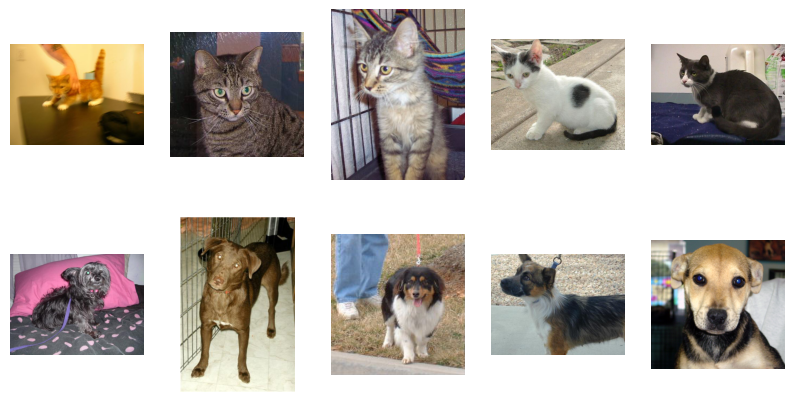

In [30]:
plt.figure(figsize = (10,5))

for i in range(5):
  plt.subplot(2,5,i+1)
  fname = str(i) + ".jpg"
  image = plt.imread(new_dir / "train" / "Cat" / fname)
  plt.imshow(image)
  plt.axis("off")

  plt.subplot(2,5,i + 1 + 5)
  fname = str(i) + ".jpg"
  image = plt.imread(new_dir / "train" / "Dog" / fname)
  plt.imshow(image)
  plt.axis("off")

In [31]:
from keras.utils import image_dataset_from_directory

train_data = image_dataset_from_directory(
    "data/Images/train",
    image_size = (180,180),
    batch_size = 32
)

validation_data = image_dataset_from_directory(
    "data/Images/validation",
    image_size = (180,180),
    batch_size = 32
)

test_data = image_dataset_from_directory(
    "data/Images/test",
    image_size = (180,180),
    batch_size = 32
)

Found 1999 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1998 files belonging to 2 classes.


In [32]:
for image, label in train_data:
    print(image.shape)
    print(label.shape)
    break

(32, 180, 180, 3)
(32,)


In [33]:
mdl = Sequential()

mdl.add(layers.Input(shape=(180, 180, 3)))

mdl.add(layers.Rescaling(1./255))
mdl.add(layers.Conv2D(128, (3, 3), activation="relu"))
mdl.add(layers.MaxPooling2D())
mdl.add(layers.Conv2D(64, (3, 3), activation="relu"))
mdl.add(layers.MaxPooling2D())
mdl.add(layers.Flatten())
mdl.add(layers.Dense(128, activation="relu"))
mdl.add(layers.Dense(64, activation="relu"))
mdl.add(layers.Dense(1, activation="sigmoid"))

mdl.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

mdl.fit(train_data, epochs=10, validation_data=validation_data)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 793ms/step - accuracy: 0.4907 - loss: 0.8558

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 58s 903ms/step - accuracy: 0.4907 - loss: 0.8540 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 806ms/step - accuracy: 0.4988 - loss: 0.6943

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 58s 912ms/step - accuracy: 0.4991 - loss: 0.6943 - val_accuracy: 0.5000 - val_loss: 0.7054
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 924ms/step - accuracy: 0.5027 - loss: 0.6967

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.5029 - loss: 0.6966 - val_accuracy: 0.5640 - val_loss: 0.6848
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5820 - loss: 0.6845

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.5823 - loss: 0.6843 - val_accuracy: 0.6200 - val_loss: 0.6539
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6609 - loss: 0.6271

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.6614 - loss: 0.6265 - val_accuracy: 0.6230 - val_loss: 0.7656
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7515 - loss: 0.5125

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.7521 - loss: 0.5116 - val_accuracy: 0.6150 - val_loss: 0.8708
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8527 - loss: 0.3370

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.8530 - loss: 0.3363 - val_accuracy: 0.6090 - val_loss: 1.3956
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 913ms/step - accuracy: 0.9442 - loss: 0.1440

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.9443 - loss: 0.1438 - val_accuracy: 0.6090 - val_loss: 1.9126
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9832 - loss: 0.0485

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.9832 - loss: 0.0485 - val_accuracy: 0.6050 - val_loss: 2.4375
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9875 - loss: 0.0576

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.9876 - loss: 0.0572 - val_accuracy: 0.6090 - val_loss: 2.6144


In [28]:
mdl.evaluate(test_data)

29/63 ━━━━━━━━━━━━━━━━━━━━ 9s 269ms/step - accuracy: 0.5992 - loss: 2.7693

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 259ms/step - accuracy: 0.5991 - loss: 2.6519


[2.4892385005950928, 0.6061061024665833]

In [38]:
vgg = tf.keras.applications.vgg16.VGG16(
    include_top = False,
    weights = "imagenet",
    input_shape = (180,180,3)
)

vgg.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


In [40]:
mdl = Sequential()

mdl.add(vgg)
mdl.add(layers.Flatten())
mdl.add(layers.Dense(128, activation = "relu"))
mdl.add(layers.Dense(64, activation = "relu"))
mdl.add(layers.Dense(1, activation = "sigmoid"))

mdl.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
mdl.fit(train_data, epochs = 10, validation_data = validation_data)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8420 - loss: 2.6673

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 238s 4s/step - accuracy: 0.8429 - loss: 2.6460 - val_accuracy: 0.9460 - val_loss: 0.4532
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9763 - loss: 0.1298

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 293s 5s/step - accuracy: 0.9762 - loss: 0.1298 - val_accuracy: 0.9400 - val_loss: 0.5425
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9878 - loss: 0.0687

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 263s 4s/step - accuracy: 0.9878 - loss: 0.0690 - val_accuracy: 0.9510 - val_loss: 0.6353
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9932 - loss: 0.0277

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 251s 4s/step - accuracy: 0.9932 - loss: 0.0278 - val_accuracy: 0.9520 - val_loss: 0.6721
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9992 - loss: 0.0074

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 256s 4s/step - accuracy: 0.9992 - loss: 0.0076 - val_accuracy: 0.9560 - val_loss: 0.6148
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9948 - loss: 0.0223

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 274s 4s/step - accuracy: 0.9948 - loss: 0.0223 - val_accuracy: 0.9490 - val_loss: 0.7821
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9935 - loss: 0.0285

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 266s 4s/step - accuracy: 0.9936 - loss: 0.0286 - val_accuracy: 0.9510 - val_loss: 0.8739
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9949 - loss: 0.0374

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 265s 4s/step - accuracy: 0.9949 - loss: 0.0373 - val_accuracy: 0.9500 - val_loss: 0.7511
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9914 - loss: 0.0936

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 286s 5s/step - accuracy: 0.9914 - loss: 0.0945 - val_accuracy: 0.9510 - val_loss: 0.7892
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9938 - loss: 0.0610

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 291s 5s/step - accuracy: 0.9938 - loss: 0.0608 - val_accuracy: 0.9510 - val_loss: 0.8699


In [41]:
mdl.evaluate(test_data)

13/63 ━━━━━━━━━━━━━━━━━━━━ 2:33 3s/step - accuracy: 0.9703 - loss: 0.3737

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 194s 3s/step - accuracy: 0.9626 - loss: 0.6740


[0.9553884267807007, 0.9574574828147888]

## AutoEncoders

In [45]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

X_train = X_train / 255.0
X_test = X_test / 255.0

X_train.shape

(60000, 784)

In [46]:
mdl = Sequential()

mdl.add(layers.Input(shape=(X_train.shape[1], )))
mdl.add(layers.Dense(128, activation = "relu"))
mdl.add(layers.Dense(64, activation = "relu"))
mdl.add(layers.Dense(32, activation = "relu"))
mdl.add(layers.Dense(64, activation = "relu"))
mdl.add(layers.Dense(128, activation = "relu"))
mdl.add(layers.Dense(X_train.shape[1], activation = "sigmoid"))

mdl.compile(optimizer = "adam", loss = "mse")
mdl.fit(X_train, X_train, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0494
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0171
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0135
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0118
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0108
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0100
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0095
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0090
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0087
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0084


In [47]:
Xpred = mdl.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step


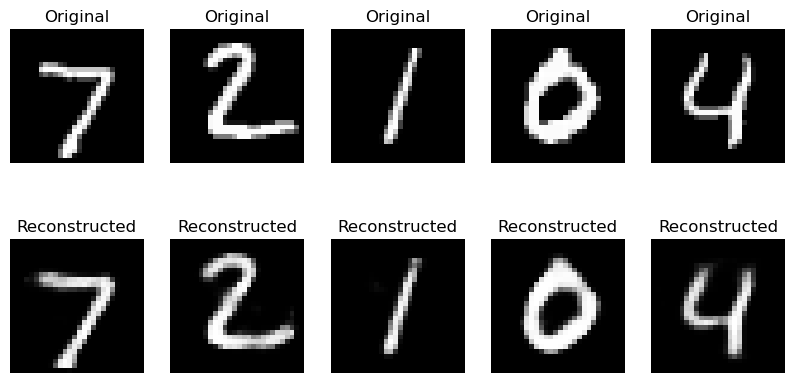

In [48]:
plt.figure(figsize = (10,5))

for i in range(5):
  plt.subplot(2,5,i+1)
  plt.imshow(X_test[i].reshape(28,28), cmap = "gray")
  plt.axis("off")
  plt.title("Original")

  plt.subplot(2,5,i + 1 + 5)
  plt.imshow(Xpred[i].reshape(28,28), cmap = "gray")
  plt.axis("off")
  plt.title("Reconstructed")

In [51]:
X_train_noisy = X_train + np.random.normal(size = X_train.shape) * 0.2
X_test_noisy = X_test + np.random.normal(size = X_test.shape) * 0.2

X_train_noisy = np.clip(X_train_noisy, 0, 1)
X_test_noisy = np.clip(X_test_noisy, 0, 1)

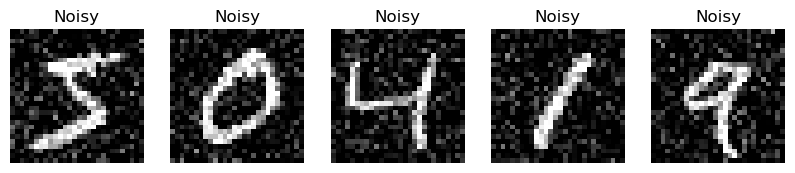

In [52]:
plt.figure(figsize = (10,5))

for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(X_train_noisy[i].reshape(28,28), cmap = "gray")
  plt.axis("off")
  plt.title("Noisy")

In [53]:
mdl = Sequential()

mdl.add(layers.Input(shape=(X_train.shape[1], )))
mdl.add(layers.Dense(128, activation = "relu"))
mdl.add(layers.Dense(64, activation = "relu"))
mdl.add(layers.Dense(32, activation = "relu"))
mdl.add(layers.Dense(64, activation = "relu"))
mdl.add(layers.Dense(128, activation = "relu"))
mdl.add(layers.Dense(X_train.shape[1], activation = "sigmoid"))

mdl.compile(optimizer = "adam", loss = "mse")
mdl.fit(X_train_noisy, X_train, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0508
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0218
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0174
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0153
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0141
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0134
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0128
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0123
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0120
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0116


In [54]:
Xpred = mdl.predict(X_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step


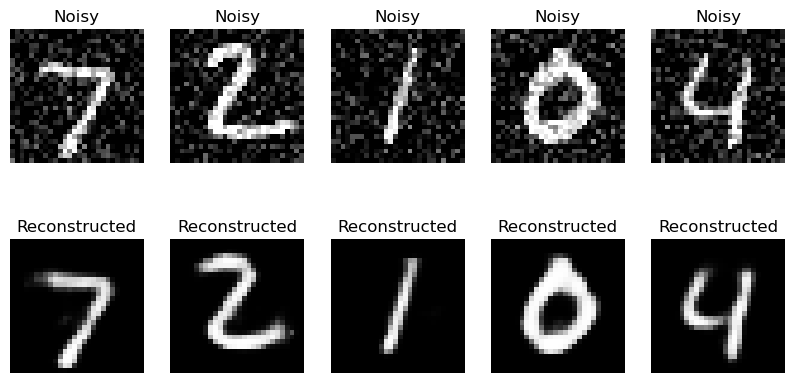

In [55]:
plt.figure(figsize = (10,5))

for i in range(5):
  plt.subplot(2,5,i+1)
  plt.imshow(X_test_noisy[i].reshape(28,28), cmap = "gray")
  plt.axis("off")
  plt.title("Noisy")

  plt.subplot(2,5,i + 1 + 5)
  plt.imshow(Xpred[i].reshape(28,28), cmap = "gray")
  plt.axis("off")
  plt.title("Reconstructed")

In [58]:
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

labels = raw_data[:, -1]
data = raw_data[:, :-1]

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
X_train_normal = X_train[y_train == 1]
X_train_abnormal = X_train[y_train == 0]

X_test_normal = X_test[y_test == 1]
X_test_abnormal = X_test[y_test == 0]

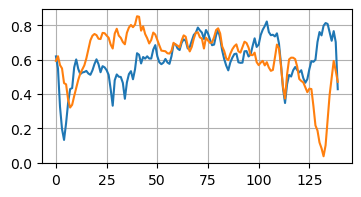

In [61]:
plt.figure(figsize = (4,2))

plt.plot(X_train_normal[0])
plt.plot(X_train_abnormal[0])
plt.grid()

In [63]:
mdl = Sequential()

mdl.add(layers.Input(shape=(X_train.shape[1], )))
mdl.add(layers.Dense(128, activation = "relu"))
mdl.add(layers.Dense(64, activation = "relu"))
mdl.add(layers.Dense(32, activation = "relu"))
mdl.add(layers.Dense(64, activation = "relu"))
mdl.add(layers.Dense(128, activation = "relu"))
mdl.add(layers.Dense(X_train.shape[1], activation = "sigmoid"))

mdl.compile(optimizer = "adam", loss = "mse")
mdl.fit(X_train_normal, X_train_normal, epochs = 10)

Epoch 1/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - loss: 0.0136 
Epoch 2/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - loss: 0.0034
Epoch 3/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - loss: 0.0022
Epoch 4/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - loss: 0.0020
Epoch 5/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - loss: 0.0016
Epoch 6/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - loss: 0.0014
Epoch 7/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - loss: 0.0013
Epoch 8/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - loss: 0.0011  
Epoch 9/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - loss: 0.0011  
Epoch 10/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - loss: 0.0011  


73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step


(array([171., 834., 672., 308., 149.,  70.,  37.,  19.,  23.,   7.,   6.,
          5.,   7.,   1.,   5.,   1.,   5.,   2.,   0.,   0.,   1.,   1.,
          0.,   1.,   0.,   1.,   1.,   0.,   0.,   1.]),
 array([0.00862554, 0.01322986, 0.01783417, 0.02243848, 0.0270428 ,
        0.03164711, 0.03625142, 0.04085574, 0.04546005, 0.05006436,
        0.05466868, 0.05927299, 0.0638773 , 0.06848162, 0.07308593,
        0.07769024, 0.08229455, 0.08689886, 0.09150318, 0.09610749,
        0.10071181, 0.10531612, 0.10992043, 0.11452474, 0.11912905,
        0.12373337, 0.12833768, 0.13294199, 0.13754632, 0.14215063,
        0.14675494]),
 <BarContainer object of 30 artists>)

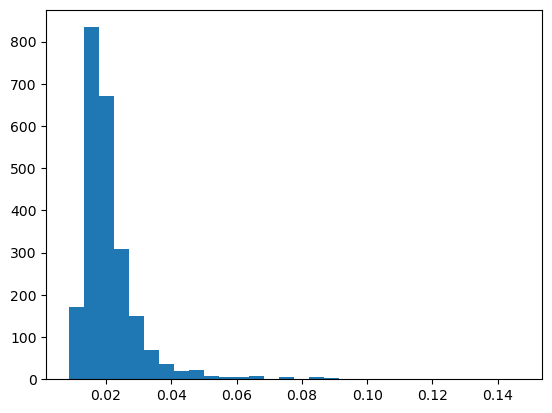

In [65]:
Xpred_normal = mdl.predict(X_train_normal)
train_mae = tf.keras.metrics.mae(X_train_normal, Xpred_normal).numpy()
plt.hist(train_mae, bins = 30)

In [66]:
thr = train_mae.mean() + train_mae.std()
thr

0.03161792

In [68]:
Xpred_test = mdl.predict(X_test)
test_mae = tf.keras.metrics.mae(X_test, Xpred_test).numpy()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step


In [69]:
ypred = np.zeros(y_test.shape)
ypred[test_mae < thr] = 1

In [70]:
from sklearn.metrics import classification_report

print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       409
         1.0       1.00      0.91      0.95       591

    accuracy                           0.95      1000
   macro avg       0.94      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000

